# 3. 비지도 학습과 데이터 전처리
### 출력 값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모들 종류의 ML
### 입력 데이터만으로 지식을 추출할 수 있어야 한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import mglearn

## 3.1 비지도 학습의 종류
### 1. 비지도 변환 : 데이터를 새롭게 표현 -> 쉽게 해석할 수 있도록 ex) 차원축소, 중요 변수로 2d 시각화
### 2. 군집 알고리즘 : 비슷한 데이터끼리 묶는 것

## 3.2 비지도 학습의 도전 과제
### 학습을 잘 했는지 평가할 지표가 없다 : 출력변수가 없기 때문에
### -> 탐색적 분석 단계에서 많이 사용
### 지도학습의 전처리 단계로도 사용
#### 비지도 학습으로 새롭게 표현된 데이터(차원 축소, 스케일링...)를 지도학습에 이용

## 3.3 데이터 전처리와 스케일 조정
### SVM, 신경망 : 데이터 스케일에 민감

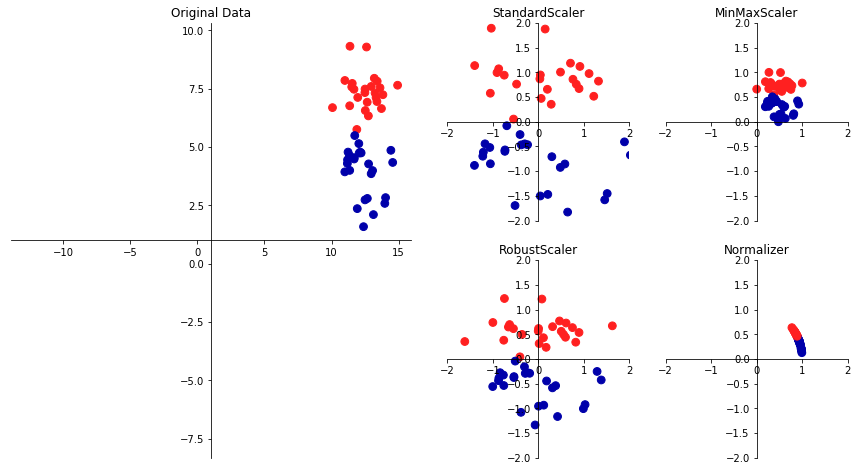

In [2]:
mglearn.plots.plot_scaling()

# 첫번째 그래프 : 두 개의 특성을 인위적으로 만든 이진 분류 데이터
# 오른쪽 4개의 그래프 : scaling 방법

# StandardScaler : 각 feature 가 평균 0 분산 1 이 되게 변환 ( (X- X_bar) / std) / 특성별로 최소 최댓값이 다르다(제한하지 않는다.)
# RobustScaler : 사분위수 (median , quantile )사용 / outlier 에 영향을 받지 않는다.((X-Q2) / Q3 - Q1))
# MinMaxScaler : 모든 feature 의 값들이 정확히 [0,1] 구간에 들어오도록 변환 ((X - X_min) / (X_max - X_min))
# Normalizer : 매우 다른 스케일 조정기법 / feature 벡터의 유클리드 거리가 1이 되도록 조정

## 3.3.2 데이터 변환 적용하기
### cancer 데이터를 사용하여
### SVM(스케일에 민감) 에 적용해보자

In [3]:
# cancer(유방암 데이터)를 불러오자
from sklearn.model_selection import train_test_split

cancer = sklearn.datasets.load_breast_cancer()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

print(X_train.shape)
print(X_test.shape)
# 특성값(feature) 의 수 : 30개

(426, 30)
(143, 30)


In [5]:
# 전처리 하기 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [6]:
# MinMaxScaler 의 fit 메서드 : 각 feature 에 대해 Min과 Max 를 계산해준다.
# X_train(훈련 데이터의 입력변수)에 대해서만 수행한다.

scaler.fit(X_train) # 실제로 데이터 변환 전에 데이터(train set)을 주어 fitting 시켜 변환 규칙을 얻는다.
# 그러면 스케일러 객체에 변환 규칙이 저장된다.
##( 마치 모델에 데이터를 fitting 시키는 것과 마찬가지)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
# transform : 실제 데이터의 스케일을 조정하기 위한 scaler 객체의 하위 메서드
X_train_scaled = scaler.transform(X_train)

In [8]:
print('변환 된 후 크기 : {}'.format(X_train_scaled.shape))
print('스케일 조정 전 feature 별 최소값 : \n {}'.format(X_train.min(axis = 0)))
print('스케일 조정 전 feature 별 최소값 : \n {}'.format(X_train.max(axis = 0)))
print('스케일 조정 후 feature 별 최소값 : \n {}'.format(X_train_scaled.min(axis = 0)))
print('스케일 조정 후 feature 별 최소값 : \n {}'.format(X_train_scaled.max(axis = 0)))

# 데이터의 크기(shape) 은 그대로. 스케일만 조정되었을 뿐

변환 된 후 크기 : (426, 30)
스케일 조정 전 feature 별 최소값 : 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 feature 별 최소값 : 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 feature 별 최소값 : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 feature 별 최소값 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [9]:
# test data 도 변환하여 SVM에 적용해야한다. transform 메서드 사용
# 변환 시 train data 에 적용한 것과 같은 변환을 적용하여야한다.
X_test_scaled = scaler.transform(X_test)

# 조정 후 속성을 확인해 보자
print('스케일 조정 후 특성별 최솟값 \n {}'.format(X_test_scaled.min(axis = 0)))
print('스케일 조정 후 특성별 최댓값 \n {}'.format(X_test_scaled.max(axis = 0)))

# train data 에 적용한 변환을 적용하였기 때문에
# 스케일링 된 test data에서는 0과 1 의 범위를 벗어나는 값이 발생할 수 있다.

스케일 조정 후 특성별 최솟값 
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최댓값 
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


## 3.3.3 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정

In [10]:
# 만약 테스트 데이터에 훈련 데이터에 사용한 변환을 적용하지 않는 경우
from sklearn.datasets import make_blobs

# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples = 50, centers = 5, random_state = 4, cluster_std = 2)

In [11]:
# 훈련 / 테스트
X_train, X_test = train_test_split(X, random_state = 5, test_size = .1)

In [12]:
X

array([[ 7.33124533e+00, -1.09317870e+01],
       [ 9.19227792e+00,  5.90049310e+00],
       [-5.93198979e+00, -1.64709857e+00],
       [ 1.22853293e+01, -9.98451231e+00],
       [ 3.34864856e+00, -3.27420491e+00],
       [-3.71087149e+00, -1.55730654e+00],
       [ 1.28384026e+01,  2.07069557e+00],
       [-3.46385853e+00, -2.66288987e-03],
       [ 6.75876661e+00,  4.27759967e+00],
       [ 2.39709664e+00, -5.31938866e+00],
       [ 8.04518325e+00,  2.14179533e+00],
       [-6.82908995e+00, -7.42440001e-01],
       [ 7.37461347e+00,  1.05351046e+00],
       [-3.03095556e+00, -2.57674027e-01],
       [ 1.00050968e+01, -1.35030828e+00],
       [ 8.90128049e+00,  5.88934367e+00],
       [ 4.54885891e+00, -7.60176369e+00],
       [ 1.27251823e+01,  1.57438869e+00],
       [-4.84314674e+00, -9.26876945e-01],
       [ 9.66038265e+00, -1.47325133e+00],
       [-1.78260426e+00, -1.71853271e+00],
       [ 9.84242817e+00, -5.89522886e+00],
       [ 8.12682221e+00,  4.03860364e+00],
       [ 7.

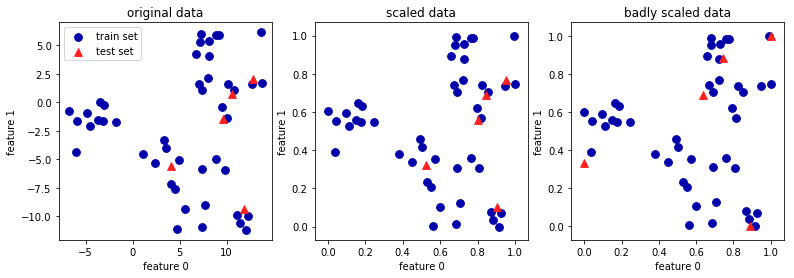

In [13]:
# 훈련/ 테스트 데이터의 산점도
fig, axes = plt.subplots(1,3, figsize = (13,4))


axes[0].scatter(X_train[:,0], X_train[:,1],
                   c = mglearn.cm2(0), label = 'train set', s = 60)

axes[0].scatter(X_test[:,0], X_test[:,1], marker = '^',
                   c = mglearn.cm2(1), label = 'test set', s = 60)
axes[0].legend(loc = 'upper left')
axes[0].set_title('original data')

# MinMaxScaler 를 통해 스케일 조정
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(X_train) # 스케일 변환 전에 해당 데이터(train set)을 주고 그에 맞게 변환을 fitting 시켜야한다.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 스케일 조정된 데이터의 산점도를 그린다.
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1],
                   c = mglearn.cm2(0), label = 'train set(scaled)', s = 60)

axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker = '^',
                   c = mglearn.cm2(1), label = 'test set(scaled)', s = 60)
axes[1].set_title('scaled data')

# test set 의 스케일을 train set 의 변환규칙 말고
# test set 에 fitting 된 변환규칙으로 스케일링 하기(예제를 위한 것으로 실제로는 이렇게 하면 안된다.)

test_scaler = MinMaxScaler()
test_scaler.fit(X_test) # test 데이터를 인자로 주어 변환 규칙을 만든다.

X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 test data 로 산점도 그리
axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], 
                   c = mglearn.cm2(0), label = 'train set(scaled)', s = 60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1], marker = '^',
                   c = mglearn.cm2(1), label = 'test set(badly scaled)', s = 60 )
axes[2].set_title('badly scaled data')


for ax in axes:
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

#### 스케일러 
#### 효율성 높이기!!!
#### fit_transform 메서드 : fit 과 transform 한번에 하기


In [14]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaled_data = scaler2.fit_transform(X_train) # 더 효율적이다.

## 3.3.4 지도 학습에서 데이터 전처리 효과
### SVM,  신경망 모델 : 스케일 조정에 따라 성능 차이가 크다.

In [15]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svc = SVC(C = 100)


In [16]:
# scaler 를 통해 데이터 스케일링
scaler = MinMaxScaler()
scaler.fit(X_train) # train data 입력변수로 변환 패턴을 맞춘다.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# scaling 하지 않고 성능 평가
svc.fit(X_train, y_train)
print('test set 에서 정확도 : {:.2f}'.format(svc.score(X_test, y_test)))

test set 에서 정확도 : 0.63


In [18]:
# scaling 후 성능 평가
svc.fit(X_train_scaled, y_train)
print('test set 에서 정확도(scaled) : {:.2f}'.format(svc.score(X_test_scaled, y_test)))

# scaling 후 성능이 훨씬 좋아졌다.

test set 에서 정확도(scaled) : 0.97


## 3.4 차원  축소, 특성 추출, 매니폴드 학습
### 비지도 학습을 사용해 데이터 변환
#### 1. 시각화하기 위해
#### 2. 데이터 압축
#### 3. 추가적 처리를 위해 정보가 더 잘 드러나는 표현을 찾기
### 많이 사용하는 방법
#### 1. 주성분 분석(PCA : Principal Analysis)
#### 2. 비음수 행렬 분해(NMF : Non - Matrix Factorization)
#### 3. t-SNE(t-distributed Stochastic Neighbor Embedding)

## 3.4.1 주성분 분석(PCA)
### 입력 변수(feature) 끼리 상관관계(선형) 이 없도록 회전시키는 기술
### 차원 축소 용도로 사용가능

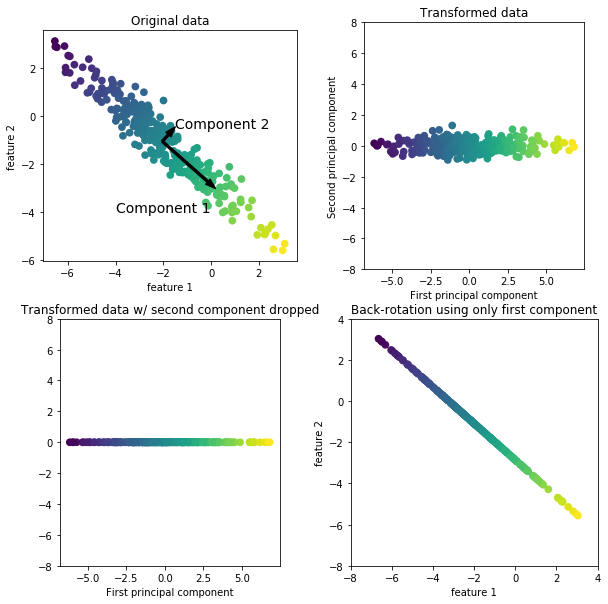

In [19]:
mglearn.plots.plot_pca_illustration()
# 인위적을 만든 2차원 데이터셋을 이용하여 PCA 효과를 나타낸 것

### PCA 를 적용해 유방암 데이터셋 시각화하기
#### 고차원 데이터 시각화에 PCA 이용

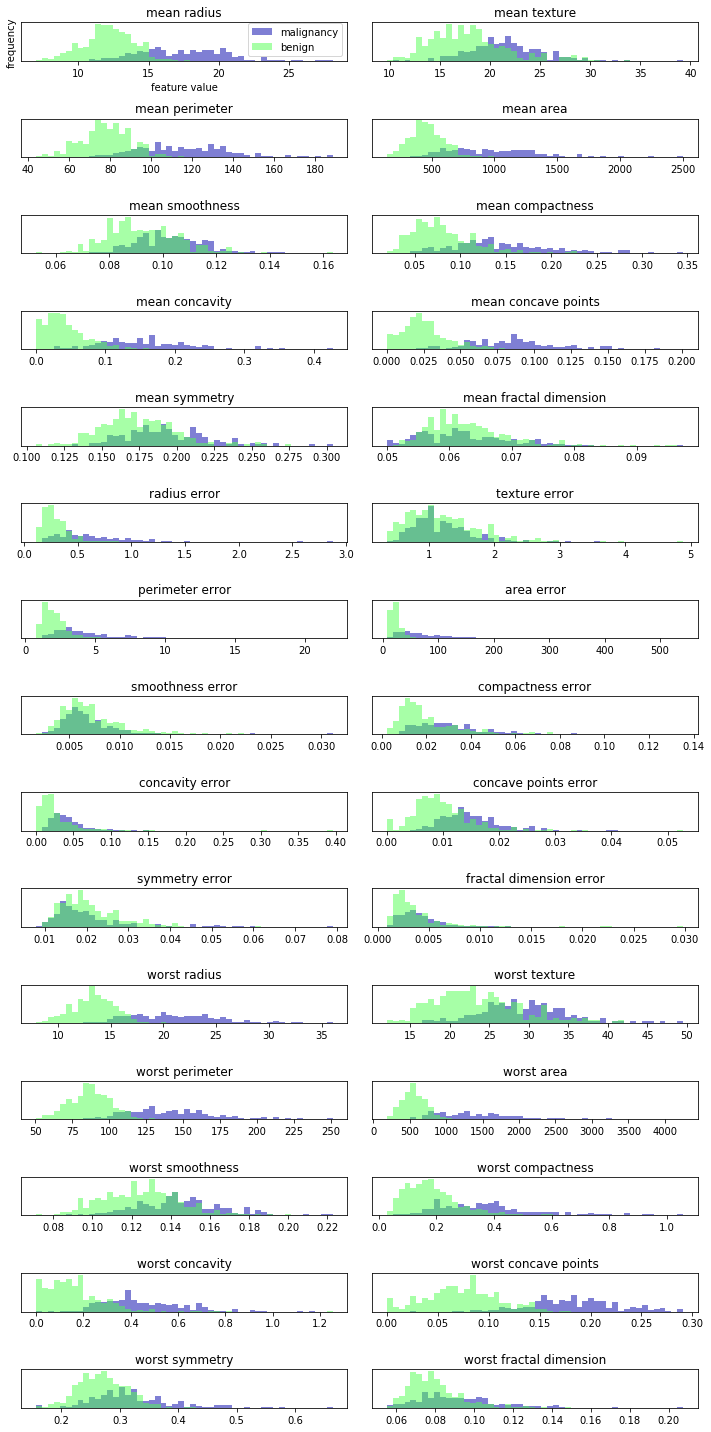

In [20]:
fig, axes = plt.subplots(15,2, figsize = (10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, color = mglearn.cm3(0), alpha = .5)
    ax[i].hist(benign[:, i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel('feature value')
ax[0].set_ylabel('frequency')
ax[0].legend(['malignancy','benign'] , loc = 'best')
fig.tight_layout()

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)

X_scaled = scaler.transform(cancer.data)

### PCA 구현 방법
#### 1. PCA 객체 생성
#### 2. fit() : 해당 데이터의 주성분 찾기
#### 3. transform() :데이터를 회전 후 차원 축소

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 인스턴스 생성 시 몇 번째 주성분까지 고려할지 인자로 넣어준다.

pca.fit(X_scaled) # 위에서 스케일링 한 유방암 데이터로 fitting 한다.

# 처음 두개의 주서분을 사용하여 데이터를 변환
X_pca = pca.transform(X_scaled)
print('원본 데이터의 형태 {}'.format(str(X_scaled.shape)))
print('PCA 로 축소된 데이터의 형태 {}'.format(str(X_pca.shape)))

# 30차원에서 2차원으로 줄었다. 

원본 데이터의 형태 (569, 30)
PCA 로 축소된 데이터의 형태 (569, 2)


Text(0,0.5,'second PCA component')

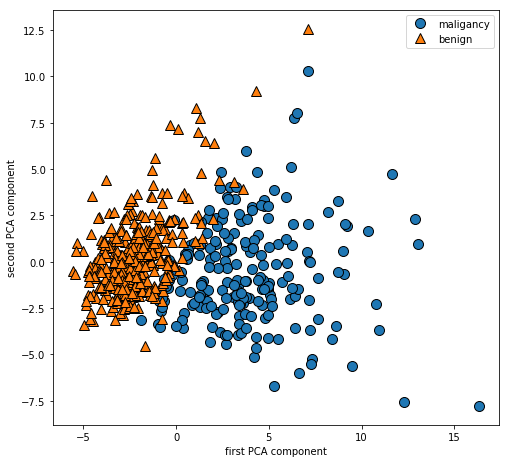

In [23]:
# 클래스를 색깔로 구분하여 처음 두개의 주성분을 그래프로 나타낸다.
plt.figure(figsize = (8,8))

mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(['maligancy','benign'], loc = 'best')
plt.gca().set_aspect('equal')
plt.xlabel('first PCA component')
plt.ylabel('second PCA component')

In [24]:
# components_ : 주성분을 볼 수 있다.
print('PCA 주성분의 가중치 : \n{}'.format(pca.components_))
print('PCA 의 주성분 형태 : {}'.format(pca.components_.shape)) 

# 2 by 30 : 즉 원래 feature(30개의 특성)의 조합으로 설정해준 주성분 2개를 만든다.
# 해당 주성분 계산 : 가중치* 각 feature 의 합

PCA 주성분의 가중치 : 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
PCA 의 주성분 형태 : (2, 30)


Text(0,0.5,'components')

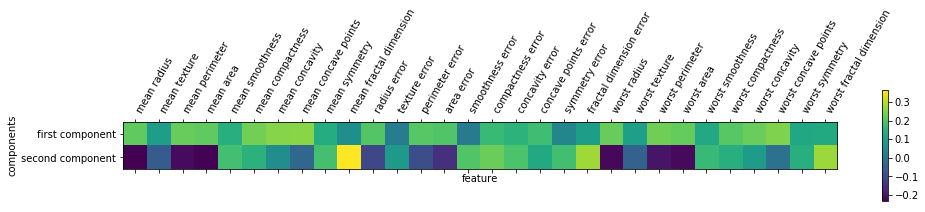

In [25]:
# 히트맵으로 시각화 하면 보기 훨씬 쉽다.
plt.matshow(pca.components_ , cmap = 'viridis')
plt.yticks([0,1], ['first component', 'second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
              cancer.feature_names, rotation = 60, ha = 'left')

plt.xlabel('feature')
plt.ylabel('components')


### 고유얼굴(eigenface) 특성 추출
#### 특성 추출 : 원본 데이터보다 더 분석에 적합한 표현을 찾는 것

In [26]:
# 에러 뜨니까 일단 이 타입으로 변환해 놓자


from sklearn.datasets import fetch_lfw_people # 유명인들의 얼굴 사진 데이터

people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5, figsize = (15,8),
                            subplot_kw = {'xticks' : (), 'yticks' : ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = im

c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
c:\program files\python36\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresiz

OSError: cannot identify image file 'C:\\Users\\HojaeLee\\scikit_learn_data\\lfw_home\\lfw_funneled\\Junichiro_Koizumi\\Junichiro_Koizumi_0024.jpg'

## 3.4.2 비음수 행렬 분해(NMF)
### 유용한 특성을 추출할 수 있다.
### 차원축소
### 음수가 아닌 성분과 계수 값을 갖는다.(음수가 아닌 특성을 가진 데이터에만 적용 가능)
### 섞여 있는 여러 데이터에서 원본값 추출에 좋음

### 인위적 데이터에 NMF 적용하기
#### 주어진 데이터가 양수인지 확인해야한다.
#### 원점에서 상대적으로 어디에 놓여있는지 중요

In [ ]:
mglearn.plots.plot_nmf_illustration()

### 얼굴 이미지에 NMF 적용하기
#### NMF 의 핵심 매개변수 : 추출할 성분의 개수

In [ ]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

## 3.4.3 t-SNE 를 이용한 매니폴드 학습
#### 매니폴드 학습 : 시각화 알고리즘
#### 탐색적 데이터 분석에 용이
#### record 끼리의 거리를 잘 나타내는 2차원 표현을 찾는 것

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize =(10,5),
                            subplot_kw = {'xticks' : () , 'yticks' : ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)
    
    
print('data 의 형식 : {}'.format(digits.data.shape))

In [ ]:
# PCA 를 이용해 2차원으로 축소하여 시각화 하자

from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 제 2 주성분까지 고려하겠다.
pca.fit(digits.data) # data 를 주어 fitting 한다.

digits_pca = pca.transform(digits.data)
colors = ["#476A2A","#7851B8","#BD3430","#4A2D4E","#875525" , 
            "#A83683","#4E655E","#853541","#3A3120","#535D8E"]
# figure 의 형태를 만든다.
plt.figure(figsize = (10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())

for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그린다.
    plt.text(digits_pca[i,0] , digits_pca[i,1], str(digits.target[i]),
                 color = colors[digits.target[i]],
                fontdict = {'weight' : 'bold' , 'size' : 9})
    
    plt.xlabel('first component')
    plt.ylabel('second component')
    
# 많은 부분이 겹쳐 있어 확실한 분류가 되진 않았다.

In [ ]:
# t-SNE 를 적용하여 비교해보자
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)
# TSNE 에는 transform 메서드가 없으므로 fit_transform 사용

digits_tsne = tsne.fit_transform(digits.data)

In [ ]:
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max() + 1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max() + 1)

for i in range(len(digits.data)):
    # 숫자  텍스트를 이용해 산점도를 그린다.
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
                color = colors[digits.target[i]],
                fontdict = {'weight' : 'bold', 'size' : 9})
    
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')
    
    
# 모든 클래스가 확실히 잘 구분됌

## 3.5 군집
### 군집 내부 : 유사
### 군집 간 : 비유사

## 3.5.1 k-means clustering
### 클러스터에 할당되는 데이터 포인트의 변화가 없을 때(수렴할 때) 종료
### 인스턴스 생성 시 초깃값
#### 1. 군집의 수
#### 2. seed

### 결과값
#### kmeans객체.labels_ : 각 data point 의 군집을 보여준다.
#### kmeans.predict(새 data point) : 새 데이터에 대한 군집화

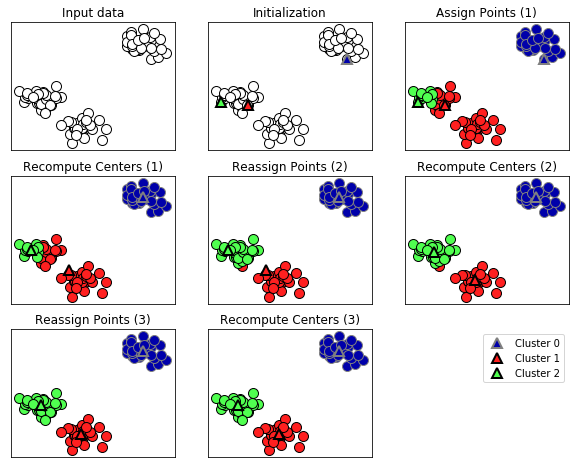

In [28]:
mglearn.plots.plot_kmeans_algorithm()


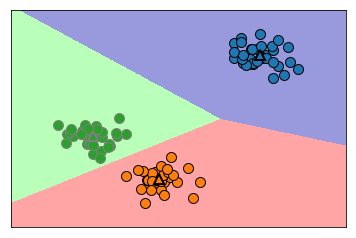

In [29]:
mglearn.plots.plot_kmeans_boundaries() # 클러스터 경계

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [31]:
#인위적 2차원 데이터셋 생성
X, y = make_blobs(random_state = 1)

In [32]:
# 군집 모델 생성
kmeans = KMeans(n_clusters = 3) # 인스턴스 생성 시 군집 수를 정해준다.
kmeans.fit(X) # input data 로 모델을 fitting

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
print('cluster 의 레이블 : \n {}'.format(kmeans.labels_))
# 각 data point(record)의 cluster 를 보여준다.

cluser 의 레이블 : 
 [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [34]:
# predict 메서드 : 새로운 데이터 포인트에 대한 군집화
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [35]:
# 군집의 번호(이름) 은 중요하지 않다.
## 초기화를 무작위로 하므로, 알고리즘을 재실행하면 번호가 다르게 부여될 수 있다.

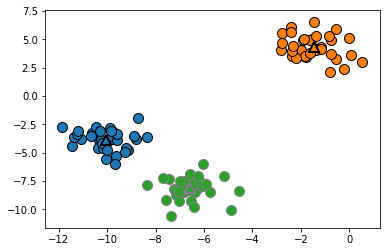

In [36]:
# 군집화 시각화하기
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers = 'o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
    markers = '^', markeredgewidth = 2)


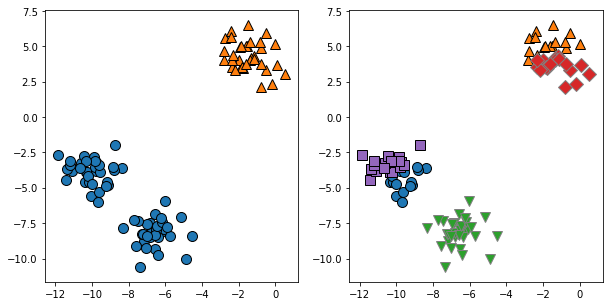

In [37]:
# 클러스터의 수를 늘이거나 줄여보자
fig, axes = plt.subplots(1,2, figsize = (10,5))

# 두개의 클러스터 중심을 사용
kmeans_2 = KMeans(n_clusters = 2)
kmeans_2.fit(X)
assignments_2 = kmeans_2.labels_ # 각 data point 가 할당된 군집의 이름


mglearn.discrete_scatter(X[:,0],X[:,1], assignments_2, ax = axes[0] )

# 다섯개의 클러스터 중심을 사용
kmeans_5 = KMeans(n_clusters = 5)
kmeans_5.fit(X)
assignments_5 = kmeans_5.labels_

mglearn.discrete_scatter(X[:,0],X[:,1], assignments_5, ax = axes[1] )

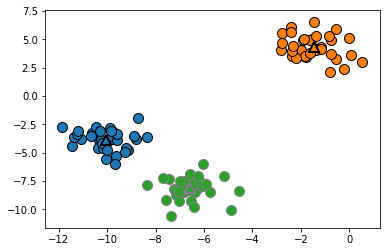

In [44]:
# center_ ( 각 군집의 중심)을 삼각형으로 표시하여 그려보기
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers = 'o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],[0,1,2],
    markers = '^', markeredgewidth = 2)

### k-means clustering 이 실패하는 겨우
#### 각 클러스터 정의 : 중심 -> 클러스터가 둥근 형태로 나타난다.
#### 모든 클러스터의 반경이 같다고 가정 / 각 클러스터의 center 사이를 가르는 결정경계

In [45]:
# kmeans clustering 에 실패하는 경우를 위해 인위적 데이터를 만들자
# cluster 마다 분산을 다르게 하여, 클러스터마다 반경을 다르게 해서 데이터를 만든다.
X_varied , y_varied = make_blobs(n_samples = 200, cluster_std = [1.0, 2.5, 0.5], random_state = 170)
y_pred = KMeans(n_clusters = 3, random_state = 0).fit_predict(X_varied)

Text(0,0.5,'feature 1')

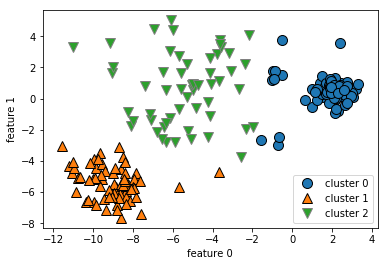

In [46]:
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)

plt.legend(['cluster 0','cluster 1','cluster 2'], loc = 'best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

### k-means clustering 은 모든 방향의 중요도가 같다.
### 성능이 데이터의 형태에 영향을 많이 받는다.

Text(0,0.5,'feature 1')

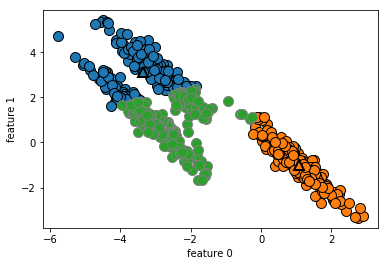

In [48]:
# 무작위로 클러스터 데이터를 생성한다.
X, y = make_blobs(random_state = 170, n_samples = 600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size = (2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans clustering 알고리즘을 적용
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다.
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers = 'o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
                            markers = '^', markeredgewidth = 2)

plt.xlabel('feature 0')
plt.ylabel('feature 1')

# 원래는 각 긴 모양들끼리 연관이 있으므로 그것끼리 군집화 해야하는데
# kmeans 는 이러한 데이터에 대해  취약하다.

In [ ]:
# two moons 데이터와 같은 U 자형 데이터에서는 성능이 정말 나빠진다.

Text(0,0.5,'feature 1')

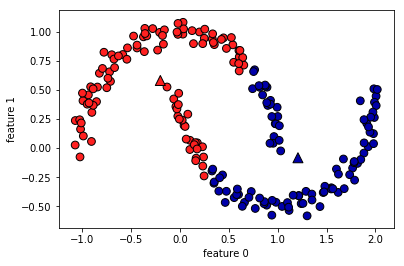

In [54]:
X_m, y_m = sklearn.datasets.make_moons(n_samples = 200, noise = .05, random_state = 0)

# 두개의 클러스터로 KMeans clustering 적용
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_m)
y_pred = kmeans.predict(X_m)

plt.scatter(X_m[:,0], X_m[:,1], c = y_pred, cmap = mglearn.cm2, s = 60, edgecolors = 'k' )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],  marker = '^',
                                c = [mglearn.cm2(0), mglearn.cm2(1)], s = 100, edgecolors = 'k')

plt.xlabel('feature 0')
plt.ylabel('feature 1')

# 군집화가 잘못되었다

### 벡터 양자화 또는 분해 메서드로서의 k-means clustering
#### PCA : 분산이 가장 큰 방향을 찾는다.
#### NMF : 극단 또는 일부분에 상응되는 중첩 가능한 성분을 찾는다.
#### k-means clustering : 클러스터 중심으로 각 데이터 포인트 표현(하나의 성분)
### 벡터 양자화 : 하나의 성분으로 분해되는 관점

### kmeans 에서 벡터 양자화의 의미
#### feature 의 수보다 많은 군집을 사용해 인코딩 가능

클러스터의 레이블 : 
 [3 8 9 2 8 4 3 0 3 0 1 5 8 0 7 3 6 5 6 7 4 0 6 0 1 9 8 4 9 6 3 1 0 9 3 4 5
 3 7 9 5 1 6 9 8 1 3 7 9 0 7 5 4 2 0 3 6 0 6 1 5 2 8 3 0 2 1 8 1 2 5 2 5 9
 0 2 9 3 6 5 4 1 5 4 9 1 3 1 5 4 6 3 4 7 4 8 8 5 2 9 0 4 1 3 2 9 2 1 8 6 7
 1 1 2 3 8 6 4 5 3 3 7 9 1 9 7 3 9 0 4 3 7 2 5 0 8 0 2 4 3 9 9 6 1 1 3 9 0
 6 9 5 8 3 6 5 1 0 5 6 6 9 0 6 8 5 8 6 5 8 0 6 2 7 7 9 0 4 7 7 6 8 2 4 8 4
 6 1 0 2 7 2 6 3 3 9 7 4 9 6 8]


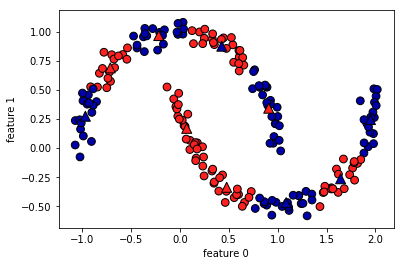

In [56]:
# make_moons 예제 : 2차원 데이터
## 차원 수(feature의 수)가 너무 적어 PCA 나 NMF 는 사용하기 어렵다.

# cluster 가 10개인 kmeans 를 사용하여 벡터 양자화를 해보자
kmeans = KMeans(n_clusters = 10)
kmeans.fit(X_m)
y_pred = kmeans.predict(X_m)


plt.scatter(X_m[:,0], X_m[:,1], c = y_pred, cmap = mglearn.cm2, s = 60, edgecolors = 'k' )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],  marker = '^',
                                c = [mglearn.cm2(0), mglearn.cm2(1)], s = 100, edgecolors = 'k')

plt.xlabel('feature 0')
plt.ylabel('feature 1')
print('클러스터의 레이블 : \n {}'.format(kmeans.labels_))

In [57]:
distance_features = kmeans.transform(X_m)
print('클러스터 거리 데이터의 형태 : {}'.format(distance_features.shape))
print('클러스터 거리 : \n {}'.format(distance_features)) # 거리행렬

# 각 sample(data point 에 대해) 각 클러스터(10개) 중심까지의 거리

클러스터 거리 데이터의 형태 : (200, 10)
클러스터 거리 : 
 [[1.02576102 1.12484411 1.80092949 ... 1.53816539 1.13956805 0.82573711]
 [0.53925926 2.27569325 2.66688513 ... 2.56407445 0.1199124  1.64355994]
 [1.3332387  0.71910707 0.94570481 ... 0.80597658 1.74914157 0.13801913]
 ...
 [1.02075656 1.04915948 1.17675174 ... 1.12816586 1.48991975 0.20648163]
 [1.76193744 0.34346911 1.31521578 ... 0.89538031 1.98056306 0.83973107]
 [0.58824958 2.189235   2.63577814 ... 2.50562123 0.04506731 1.60085948]]


### k-means clustering 의 단점
#### 1. 군집의 모양이 가정되어있다 : 구형 군집이 아닌 경우 성능이 떨어진다.
#### 2. 클러스터의 갯수를 지정해주어야 한다.
#### 3. 난수 초깃값에 따라 결과가 달라진다(default 로 10개의 초깃값으로 돌린 것 중 가장 좋은 모델을 선택한다.)


## 3.5.2 병합 군집
### 계층적 군집
### 각 data point 를 하나의 클러스터로 간주하고, 유사한 것끼리 합쳐나간다.
### 종료 조건 : 클러스터의 개수
#### 1. ward : 분산 증가가 가장 작은 두 클러스터를 합친다. / 크기가 비교적 비슷한 클러스터 생성
#### 2. average(평균 연결법)
#### 3. complete(최장 연결법)

### 클러스터의 수가 비스살 때 ward 가 적합
### 클러스터 당 수의 차이가 심할 때 complete 나 average 사용

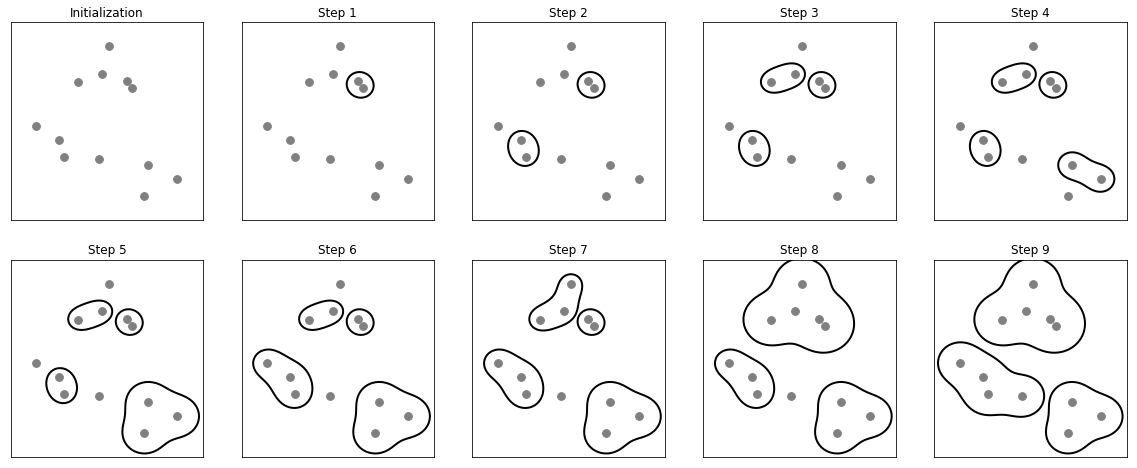

In [58]:
mglearn.plots.plot_agglomerative_algorithm()

### 병합 군집은 새로운 데이터 포인트에 대해 예측을 할 수 없다.
### predict 메서드 x
### fit_predict : train data 로 모델을 만들고 클러스터 소속 정보를 알 수 있다.

Text(0,0.5,'feature 1')

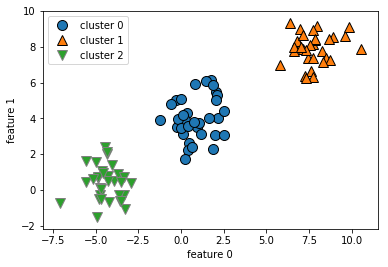

In [60]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state = 3)

agg = AgglomerativeClustering(n_clusters = 3) # cluster 의 수가 3개가 될 때까지 병합하라
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)

plt.legend(['cluster 0','cluster 1','cluster 2'], loc = 'best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

### 계층적 군집과 덴드로그램

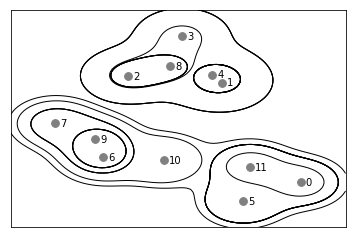

In [61]:
mglearn.plots.plot_agglomerative()
# 이 그래프는 2차원에 국한되지만
# 덴드로그램은 다차원 데이터의 계층적 군집화를 시각화할 수 있다.(Scipy 에서 제공)

Text(0,0.5,'cluster distance')

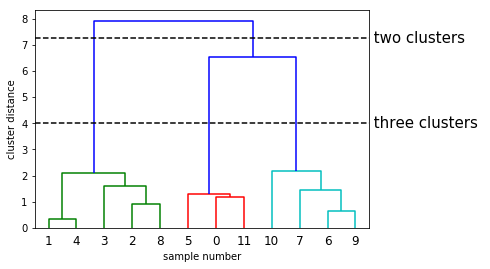

In [65]:
# scipy 에서 ward 군집 함수와 덴드로그램 함수를 임포트한다.
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state = 0, n_samples = 12)
# 데이터 배열 x 에 ward 함수를 적용한다.
# scipy 의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 반환한다.
linkage_array = ward(X) # distance matrix
# 클러스터 간의 거리 정보가 담긴 linkage_array 를 사용해 덴드로그램을 그린다.
dendrogram(linkage_array)

# 두개와 세개의 클러스터를 구분하는 커트라인을 표시한다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds , [7.25, 7.25], '--', c = 'k')
ax.plot(bounds, [4,4], '--', c = 'k')

ax.text(bounds[1], 7.25, ' two clusters ', va = 'center', fontdict = {'size' : 15})
ax.text(bounds[1], 4, ' three clusters ', va = 'center', fontdict = {'size' : 15})
plt.xlabel('sample number')
plt.ylabel('cluster distance')

# two moons 와 같은 복잡한 데이터는 구분이 힘들다

## 3.5.3 DBSCAN(Density-Based Spatial Clustering of Applications with Noise)
### 클러스터의 개수를 미리 지정할 필요가 없다
### 복잡도 형상도를 찾을 수 있다.
#### 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있다.
#### 밀집 지역(붐비는 지역) 의 포인트를 찾는다.
##### 밀집 지역이 클러스터가 되며, 밀집도가 낮은 곳이 클러스터를 구분하는 중간 부분이 된다.
### 핵심 샘플 : eps 거리 안의 데이터가 min_samples 이상인 data point (밀집 된 지역에 있는 포인트)

### DBSCAN 의 작동원리
#### 무작위로 데이터 포인트를 선택한다.
#### eps 거리 안의 포인트를 모두 찾는다.( 핵심 샘플의 조건을 충족하지 못하는 경우 잡음이 된다.)
#### 모든 클러스터에 대해 eps 거리 안에 핵심 샘플이 없을 때까지 군집화를 반복(클러스터 외부 데이터는 모두 잡음이 될 때까지)

### 옵션의 의미 정리
#### 1. eps 
#### - 유사한 데이터로 취급하는 허용범위 : eps 증가 -> 클러스터에 더 많은 data point 
#### - 간접적으로 클러스터의 수를 정해준다.
#### - MinMaxScaler, StandardScaler 를 통해 적절한 eps 값을 얻을 수 있다.
#### 2. mim_samples
#### - 핵심 샘플이 되기 위해 유사한 이웃의 최소 수 : min_samples 증가 -> 핵심 데이터 수 감소 -> 잡음 포인트 증가
#### - 덜 조밀한 지역에 있는 포인트들이 잡음이 될것인지, 하나의 클러스터가 될 것인지
#### - 클러스터의 최소 크기를 정한다고 볼 수 있다.

In [67]:
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state = 0, n_samples = 12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('클러스터의 레이블 : \n {}'.format(clusters))

# 모든 데이터 포인트가 잡음(-1) 으로 처리되었다. cluster 가 없는 상태
# 작은 데이터 셋에 적합하지 않은 DBSCAN 의 특성(eps, min_samples)

클러스터의 레이블 : 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


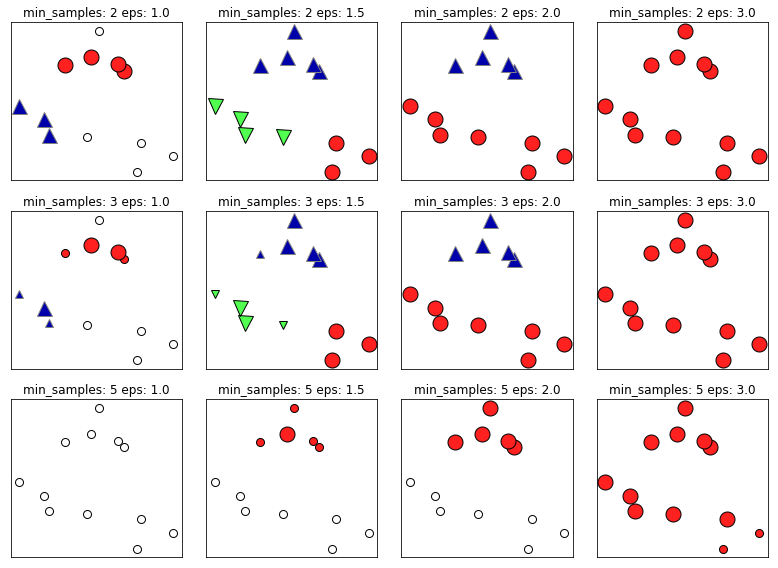

In [68]:
mglearn.plots.plot_dbscan()

Text(0,0.5,'feature 1')

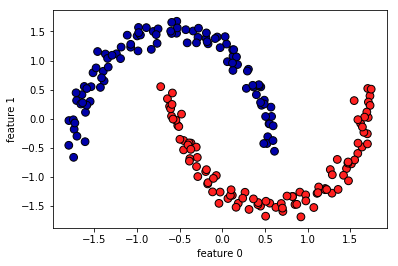

In [70]:
from sklearn.datasets import make_moons
# two_moons 데이터에 DBSCAN 을 적용해보자
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

# 평균 0, 분산 1 로 스케일 조정
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# 클러스터의 할당을 표시
plt.scatter(X_scaled[:,0], X_scaled[:, 1], c = clusters, cmap = mglearn.cm2, s = 60, edgecolors = 'black')

plt.xlabel('feature 0')
plt.ylabel('feature 1')

# 스케일 조정하니까 완전 완벽하게 나눔!!!
# 이처럼 확실하게 cluster 가 보이지만 
# 원형 클러스터가 아닌(U자형 등등) 인 경우 kmeans clustering 보다 밀도기반의 clustering(DBSCAN) 이 훨씬 성능이 좋다.

In [71]:
print(clusters)

[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


## 3.5.4 군집 알고리즘의 비교와 평가
### 정답(target value) 가 없기 때문에 평가가 어려움

### target value 로 군집 평가하기
#### 1. ARI(Adjusted Rand Index) : 범위(-1 ~ +1) / 군집을 무작위로 할당시 ARI = 0
#### 2. NMI(Normalized Mutual Information)

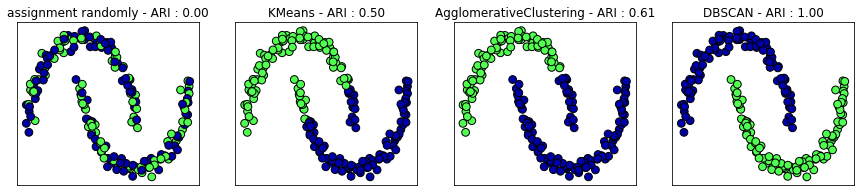

In [74]:
from sklearn.metrics.cluster import adjusted_rand_score

X,y = make_moons(n_samples = 200, noise = .05, random_state = 0)

# 평균 0 분산 1 로 스케일 조정
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize = (15,3),
                                subplot_kw = {'xticks' : (), 'yticks' : ()})

# 사용할 알고리즘의 리스트
algorithms = [KMeans(n_clusters = 2), AgglomerativeClustering(n_clusters = 2), DBSCAN()]

# 비교대상 : 무작위 클러스터 할당
random_state = np.random.RandomState(seed = 0)
random_clusters = random_state.randint(low = 0, high = 2, size = len(y)) # data  point 수 만큼 0 or 1 로 랜덤으로 군집 할당

# 무작위 할당을 그린다.
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c= random_clusters, 
                    cmap = mglearn.cm3, s = 60, edgecolors = 'black')

axes[0].set_title('assignment randomly - ARI : {:.2f}'.format(adjusted_rand_score(y, random_clusters)))


for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 크럴스터 중심을 그린다.
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c = clusters,
                  cmap = mglearn.cm3, s = 60, edgecolors = 'black')
    ax.set_title("{} - ARI : {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [75]:
# clustering 평가 방법에서 실수 : accuracy 를 사용하는 것
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]

# 모든 레이블이 달라졌으므로 정확도은 0
print('정확도 : {:.2f}'.format(accuracy_score(clusters1, clusters2)))
# 같은 포인트가 한 클러스터에 모였으므로 ARI는 1이다
print('ARI : {:.2f}'.format(adjusted_rand_score(clusters1, clusters2)))

# accuracy : 예측한 것이 target 과 이름이 같은가
# clustering : 같은 무리에 속해 있는가
# 군집은 데이터 포인트가 같은 무리에 들어있는가의 여부이기 때문에 accuracy 로 평가하면 잘못될 수 있다.

정확도 : 0.00
ARI : 1.00


### 타깃값(target value) 없이 군집 평가하기
#### ARI 의 문제점 : 일반적으로 군집화는 target value 자체가 존재하지 않는다.
#### 실루엣 점수 : cluster 의 밀집 정도를 계산/ 최댓값 1
#### from sklearn.metrics.cluster import silhouette_score

### 더 믿을만한 평가 지표(clustering)
#### 견고성 기반 평가 : 데이터에 변화(잡음 추가, 매개변수) 를 주고 반복 실행하여도 일정하다면 신뢰할만하다.

### 얼굴 데이터 셋으로 군집 알고리즘 비교